# Propriétés d'une population fictive : analyse univariée quantitative

## Importer les librairies nécessaires

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [177]:
### Lire le fichier corrigé manuellement – ne pas effacer ce fichier !

path = 'data/insurance.csv'

insurance = pd.read_csv(path)
#insurance.set_index('', inplace=True)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [178]:
## Nombre de lignes et de colonnes du tableau
insurance.shape

(1338, 7)

In [179]:
### Nombre de lignes du tableau
ins = insurance
#obs = observations # 900
len(ins)

1338

### Afficher et inspecter les données: âge

In [180]:
### On crée une variable qui contient seulement la colonne 'âge'
#  c'est-à-dire la pandas.Series, la série ou liste de données 'âge'
age = ins['age']
type(age), age.head()

(pandas.core.series.Series,
 0    19
 1    18
 2    28
 3    33
 4    32
 Name: age, dtype: int64)

In [181]:
### Noter la différence de type: DataFrame et Series
# Les méthodes sont parfois communes, parfois spécifiques
type(ins), type(age)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

<Axes: ylabel='Frequency'>

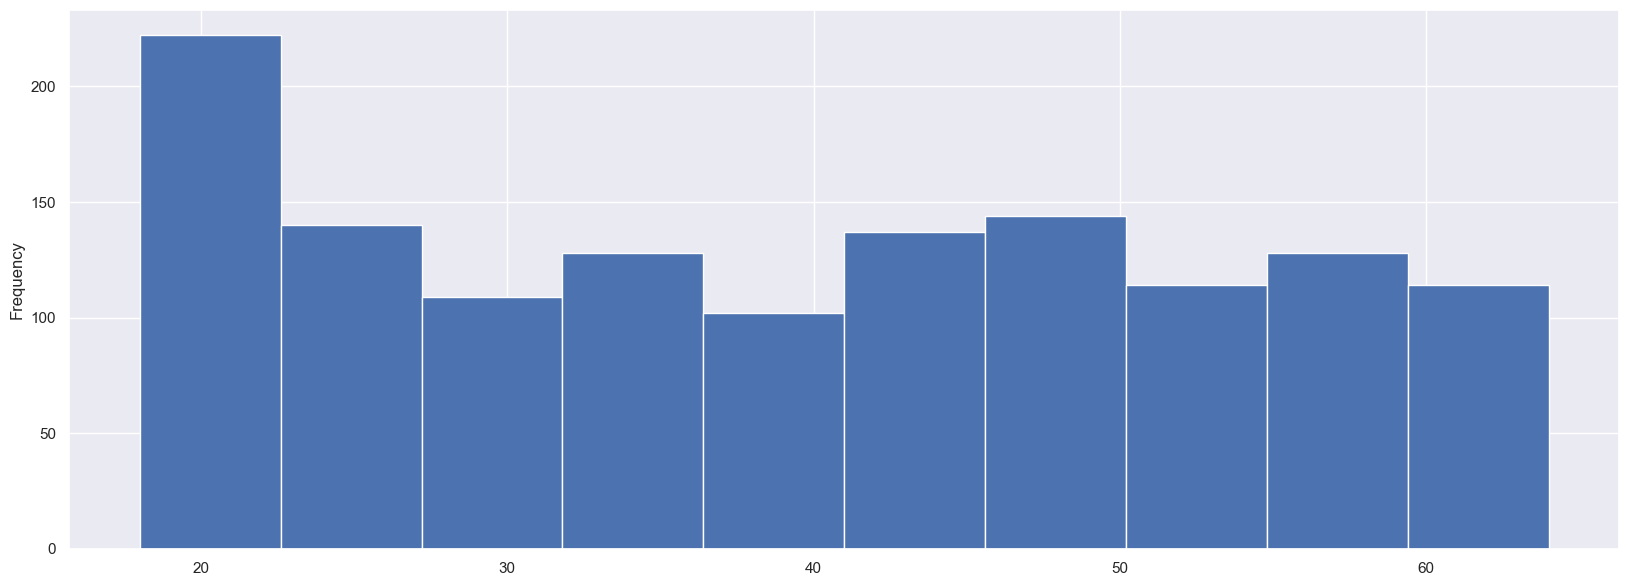

In [182]:
### Représentation par défaut en mode ligne à éviter (!!!) dans ce cas:
#  des surfaces sans sens
age.plot.hist(figsize=(20,7))

In [183]:
### Les individus en abscisses avec leur age en ordonnées:
#  type de représentation à éviter (!) dans ce cas
#age.plot(style='.',figsize=(20,7))

In [184]:
### Avec le diagramme à barres on a une 'image' plus parlante
# de l'age des individus mais illisible sans tri — il s'agira donc de trier
#ax = age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
#ax.tick_params(axis = 'x', labelsize = 10)

In [188]:
### Tri ascendant des valeurs
#  Pour le tri déscendant, 
#  mettre en argument de la fonction sort_values: ascending=False
s_age = age.sort_values() 
s_age.head()

1248    18
482     18
492     18
525     18
529     18
Name: age, dtype: int64

In [189]:
### Cette visualisation donne une impression de la croissance des âges
#x = s_age.plot(x='lab', y='val', rot=70, figsize=(25,7))
#ax.tick_params(axis = 'x', labelsize = 8)

### Effectifs par valeur

Âge est traité comme variable quantitative discrète. C'est un cas limite car, étant donné la quantité de valeurs différentes, on pourrait aussi établir des classes et traiter l'âge comme variable quantitative continue.

À noter également que renseigner l'âge en années revient à créer des classes, les _années_ étant dans les _classes_ de valeurs, car l'âge peut aussi être mesurée en jours, ce qui est plus précis mais généralement moins significatif, du moins pour les naissances d'une population telle que celle-ci.



In [20]:
### Regrouper par âge et compter les individus par valeur
# Distribution par valeur de l'age !
cs_age = s_age.groupby(s_age).count()
print(type(cs_age))
cs_age.head()

<class 'pandas.core.series.Series'>


age
18    69
19    68
20    29
21    28
22    28
Name: age, dtype: int64

In [21]:
### Transformer la serie en dataFrame
df_cs_age = pd.DataFrame(cs_age)
print(type(df_cs_age))
df_cs_age.head()

<class 'pandas.core.frame.DataFrame'>


,age
age,
18,69
19,68
20,29
21,28
22,28


In [22]:
### Renommer la colonne
df_cs_age.columns=['effectif']
df_cs_age.head(), df_cs_age.index[:5]

(     effectif
 age          
 18         69
 19         68
 20         29
 21         28
 22         28,
 Index([18, 19, 20, 21, 22], dtype='int64', name='age'))

In [23]:
### Ajouter les effectifs cumulés
# On ajoute à un cellule la valeur de la précédente
df_cs_age['effectif_cumule'] = df_cs_age['effectif'].cumsum()
df_cs_age.head()

,effectif,effectif_cumule
age,,
18,69,69
19,68,137
20,29,166
21,28,194
22,28,222


### Fréquence et fréquence cumulée

In [24]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_cs_age['frequence'] = (100 * df_cs_age['effectif'] \
                                   / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence
age,,,
18,69,69,5.16
19,68,137,5.08
20,29,166,2.17
21,28,194,2.09
22,28,222,2.09


In [25]:
### Ajouter la fréquence cumulée
df_cs_age['frequence_cumulee'] = (100 * df_cs_age['effectif_cumule'] \
                                / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
18,69,69,5.16,5.16
19,68,137,5.08,10.24
20,29,166,2.17,12.41
21,28,194,2.09,14.50
22,28,222,2.09,16.59


In [190]:
### Le centre de la population, partie inférieure
df_cs_age[df_cs_age['frequence_cumulee']<= 50].head(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
18,69,69,5.16,5.16
19,68,137,5.08,10.24
20,29,166,2.17,12.41


In [27]:
### Le centre de la population, partie supérieure
df_cs_age[df_cs_age['frequence_cumulee']>= 50].head(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
39,25,674,1.87,50.37
40,27,701,2.02,52.39
41,27,728,2.02,54.41


### Représentations graphiques

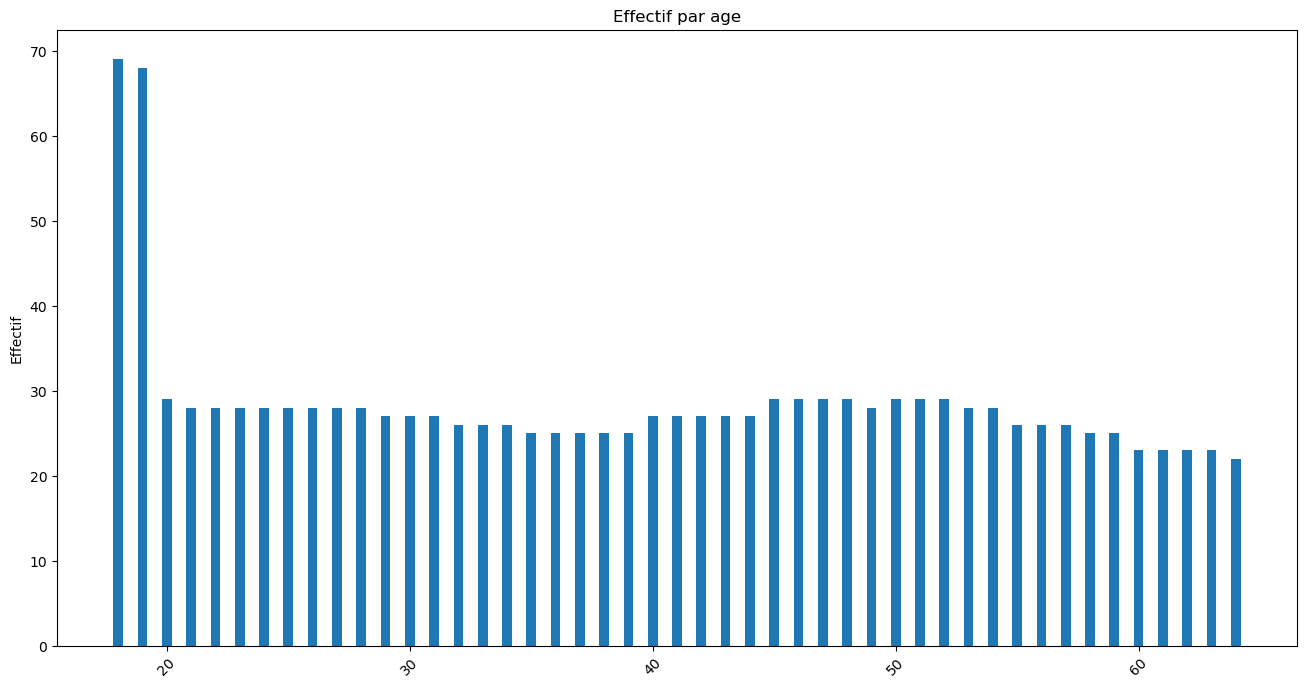

In [28]:
# Distribution des effectifs par age

objects = df_cs_age.index
eff = df_cs_age['effectif']

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par age')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


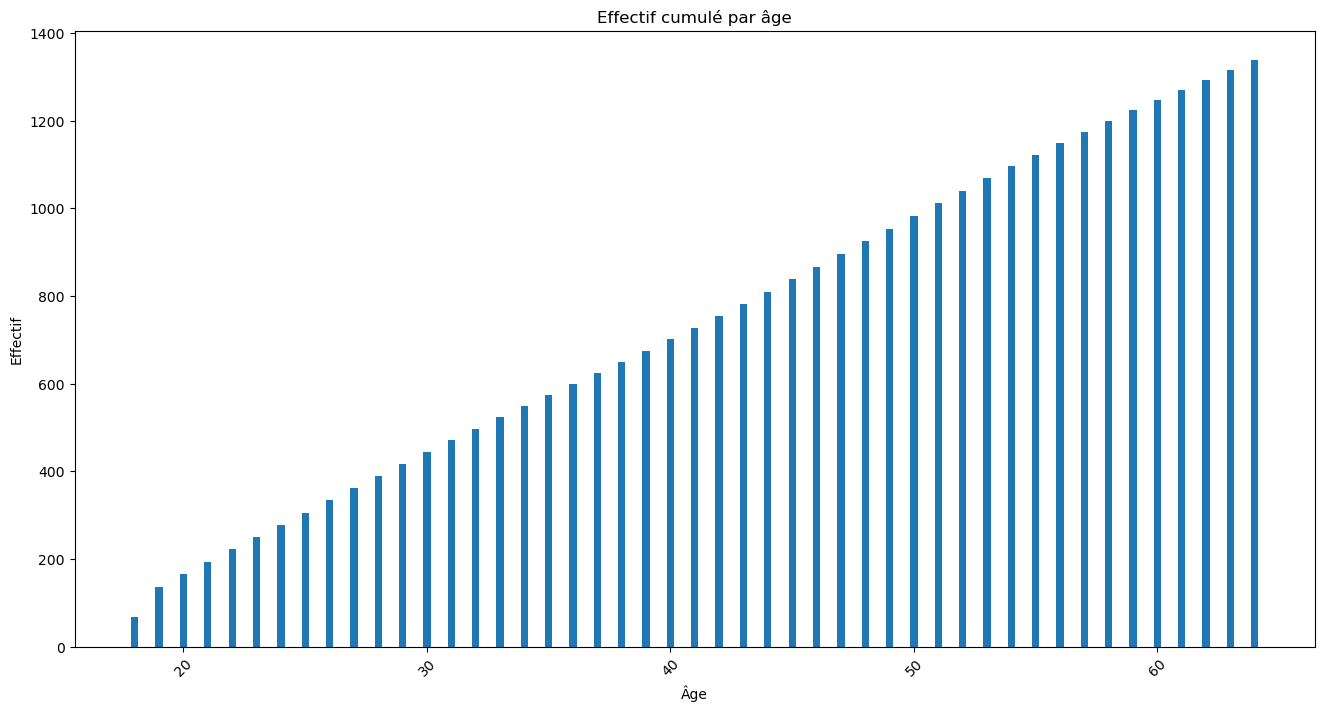

In [29]:
# Effectifs cumulés par âge

objects = df_cs_age.index
eff = df_cs_age['effectif_cumule']
#eff = df_cs_age['frequence_cumulee']



p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.xlabel('Âge')
plt.title('Effectif cumulé par âge')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


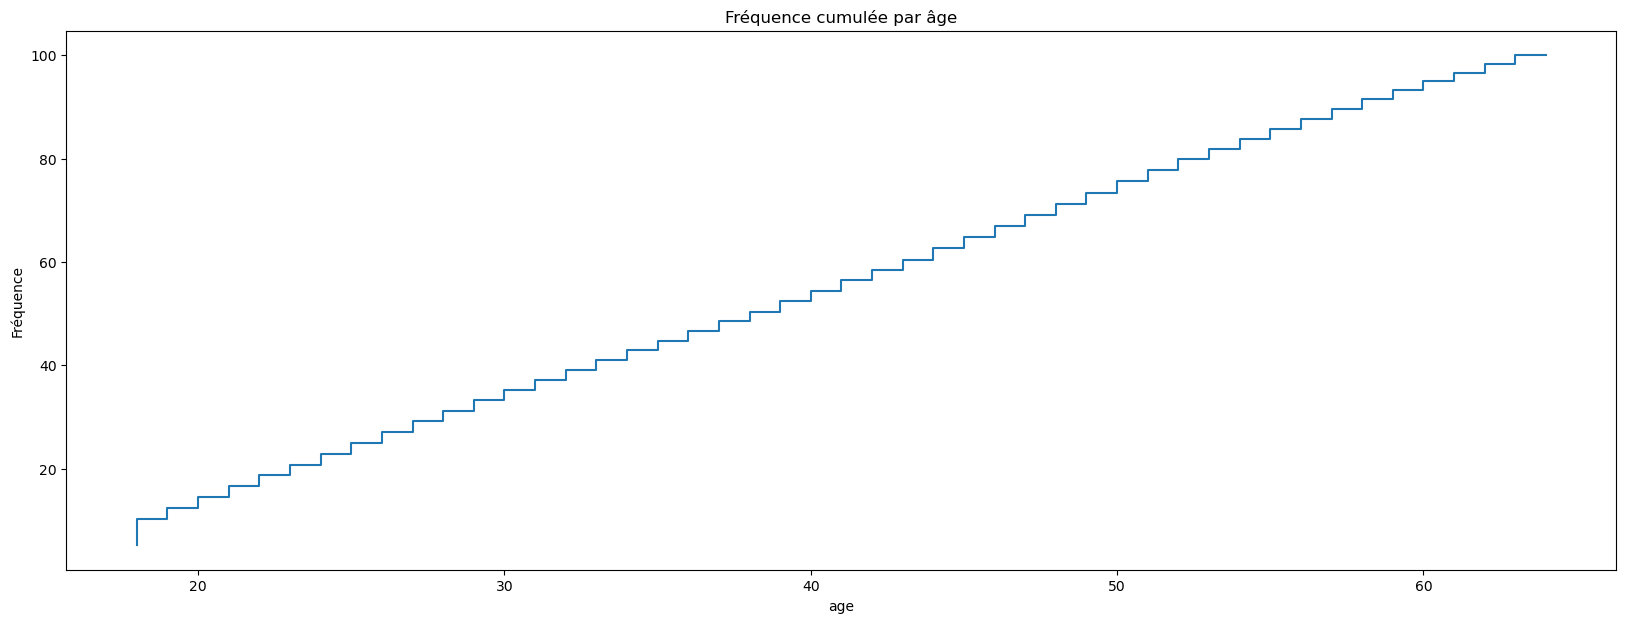

In [30]:
### Diagramme cumulatif : fréquences cumulées
#  On observe que la médiane est autour de 45 ans,
#  i.e. que la moitié de la population a moins de 45 ans, le reste plus 
plt.ylabel('Fréquence')
plt.xlabel('Âge')
plt.title('Fréquence cumulée par âge')
df_cs_age['frequence_cumulee'].plot(figsize=(20,7), drawstyle='steps') #  style='o--',
plt.draw()

In [191]:
### Deux représentations graphiques différentes pour la même croissance.
# noter qu'à identité de données l'impression visuelle est différente
# Documentation
#   https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py
#x = df_cs_age.index
#y = df_cs_age['frequence_cumulee']
#fig = plt.figure(figsize=[20,8])
#plt.ylabel('Fréquence')
#plt.xlabel('Âge')
#plt.title('Fréquence cumulée par âge')
### Commenter l'une des deux lignes suivantes pour voire la différence
#plt.step(x, y, label='pre (default)')
#plt.plot(x, y, 'o--', color='grey', alpha=0.3)
#plt.show()

## Paramètres de centralité et de dispersion

In [32]:
### Cette méthode d'une série fournit les caractéristiques
#  de tendance centrale et de dispersion
# À avoir toujours sous la main pour les variables quantitatives 
age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [33]:
### La valeur la plus fréquente
age.mode()[0]

18

In [36]:
### Quel effectif a-t-elle ?
len(age[age == 18])

69

<Axes: >

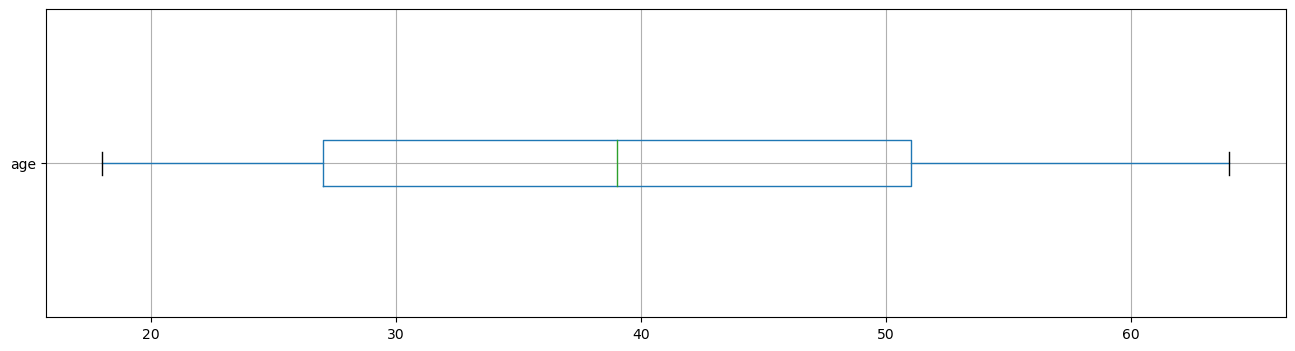

In [38]:
### Diagramme-boîte ou boîte-à-moustache pour représenter la dispersion
# Ligne centrale = la médiane. Le box est entre 1er et 3e quartile
# La moitié de la population se situe entre 31 et 68 ans
#  Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
ins.boxplot(column=['age'], vert=False, figsize=(16,4))

In [39]:
### Calcul des valeurs extrêmes
# NB Il n'y en a parmi les valeurs de cette variable 
q1 = age.quantile(q=0.25); print(f'Première quartile: {q1}')
q2 = age.quantile(q=0.5); print(f'Médiane: {q2}')
q3 = age.quantile(q=0.75); print(f'Troisième quartile: {q3}')
print('-----')
distance_inter_quantile = q3-q1
print(f'Ecart interquartile = {distance_inter_quantile};  Multiplié par 1.5 = {distance_inter_quantile*1.5}')
print('Valeurs extrèmes:')
extr_inf = q1 - distance_inter_quantile * 1.5; print(f'Limite inférieure = {extr_inf}, valeur minimale réelle: {min(age)}')
extr_sup = q3 + distance_inter_quantile * 1.5; print(f'Limite supérieure = {extr_sup}, valeur maximale réelle: {max(age)}')

Première quartile: 27.0
Médiane: 39.0
Troisième quartile: 51.0
-----
Ecart interquartile = 24.0;  Multiplié par 1.5 = 36.0
Valeurs extrèmes:
Limite inférieure = -9.0, valeur minimale réelle: 18
Limite supérieure = 87.0, valeur maximale réelle: 64


In [192]:
### Violinplot : rend visible la différente densité de la distribution
#  https://mode.com/blog/violin-plot-examples/
#  https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

#sns.set_theme(style="whitegrid")

#sns.set(rc={"figure.figsize":(14, 7)})


#a = ins["age"]

#ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont coupées car postulées
#ax.set_xlim(left=min(a), right=max(a))



### Histogramme

Observer les différents découpages des âges (générations) qui suivent et des effectifs respectifs:

lequel est le plus pertinent scientifiquement ?


In [42]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
c_obs = ins.copy(deep=True)

In [44]:
### Ajouter une colonne avec codage des années de naissance 
# en relation avec des classes significatives au point de vue heuristique du domaine étudié,
# modifiables en fonction de la problématique 
# Par exemple: en formation, jeunes travailleurs, travailleurs expérimentés, travailleurs seniors, préretraite, retraités
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 64]
c_obs['generation_heur'] = pd.cut(c_obs['age'], generations, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
c_obs['generation_heur'] = c_obs['generation_heur'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,sex,bmi,children,smoker,region,charges,generation_heur
0,19,female,27.90,0,yes,southwest,16884.9240,18-25
1,18,male,33.77,1,no,southeast,1725.5523,18-25
2,28,male,33.00,3,no,southeast,4449.4620,26-35


In [46]:
### Ajouter une colonne avec codage des années de naissance 
# en relation avec une amplitude identique des classes
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

c_obs['generation_cut'] = pd.cut(c_obs['age'], 5, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['generation_cut'] = c_obs['generation_cut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(5)

,age,sex,bmi,children,smoker,region,charges,generation_heur,generation_cut
0,19,female,27.900,0,yes,southwest,16884.92400,18-25,18-26
1,18,male,33.770,1,no,southeast,1725.55230,18-25,18-26
2,28,male,33.000,3,no,southeast,4449.46200,26-35,27-35
3,33,male,22.705,0,no,northwest,21984.47061,26-35,27-35
4,32,male,28.880,0,no,northwest,3866.85520,26-35,27-35


In [48]:
### Ajouter une colonne avec codage des années de naissance 
# en relation de classes avec effectifs identiques ou proches
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

c_obs['generation_qcut'] = pd.qcut(c_obs['age'], 5)  
 
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['generation_qcut'] = c_obs['generation_qcut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(5)

,age,sex,bmi,children,smoker,region,charges,generation_heur,generation_cut,generation_qcut
0,19,female,27.900,0,yes,southwest,16884.92400,18-25,18-26,17-23
1,18,male,33.770,1,no,southeast,1725.55230,18-25,18-26,17-23
2,28,male,33.000,3,no,southeast,4449.46200,26-35,27-35,24-33
3,33,male,22.705,0,no,northwest,21984.47061,26-35,27-35,24-33
4,32,male,28.880,0,no,northwest,3866.85520,26-35,27-35,24-33


### Amplitudes et effectifs

In [49]:
### Lister les categories
c = c_obs['generation_heur'].unique(); print(c)
list(c.categories)

['18-25', '26-35', '46-55', '36-45', '56-63', NaN]
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-63']


['18-25', '26-35', '36-45', '46-55', '56-63']

In [193]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Pertinent en fonction de critères de domaine liés à l'âge
gb_generation_heur = pd.DataFrame(c_obs.groupby('generation_heur').size())
gb_generation_heur.columns = ['effectif']
gb_generation_heur.head()

,effectif
generation_heur,
18-25,306
26-35,268
36-45,264
46-55,284
56-63,194


In [51]:
### Lister les categories
c = c_obs['generation_cut'].unique(); print(c)
list(c.categories)

['18-26', '27-35', '45-53', '36-44', '54-63']
Categories (5, object): ['18-26' < '27-35' < '36-44' < '45-53' < '54-63']


['18-26', '27-35', '36-44', '45-53', '54-63']

In [194]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Amplitude égale mais effectifs différents: le moins significatif scientifiquement?
gb_generation_cut = pd.DataFrame(c_obs.groupby('generation_cut').size())
gb_generation_cut.columns = ['effectif']
gb_generation_cut.head()

,effectif
generation_cut,
18-26,362
27-35,237
36-44,239
45-53,258
54-63,242


In [53]:
### Lister les categories
c = c_obs['generation_qcut'].unique(); print(c)
list(c.categories)

['17-23', '24-33', '44-53', '34-43', '54-63']
Categories (5, object): ['17-23' < '24-33' < '34-43' < '44-53' < '54-63']


['17-23', '24-33', '34-43', '44-53', '54-63']

In [195]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Les effectifs sont presque identiques, l'amplitude des classes en découle
gb_generation_qcut = pd.DataFrame(c_obs.groupby('generation_qcut').size())
gb_generation_qcut.columns = ['effectif']
gb_generation_qcut.head()

,effectif
generation_qcut,
17-23,278
24-33,271
34-43,260
44-53,287
54-63,242


## Représentation graphique: Diagramme à barres

Comparer les différents cas de figure, en utilisant alternativement l'un ou l'autre scénario de classement

In [55]:
objects = [l for l in gb_generation_heur.index]
eff = [l for l in gb_generation_heur['effectif']]
nom = 'heur'

In [56]:
objects = [l for l in gb_generation_cut.index]
eff = [l for l in gb_generation_cut['effectif']]
nom ='cut'

In [57]:
objects = [l for l in gb_generation_qcut.index]
eff = [l for l in gb_generation_qcut['effectif']]
nom = 'qcut'

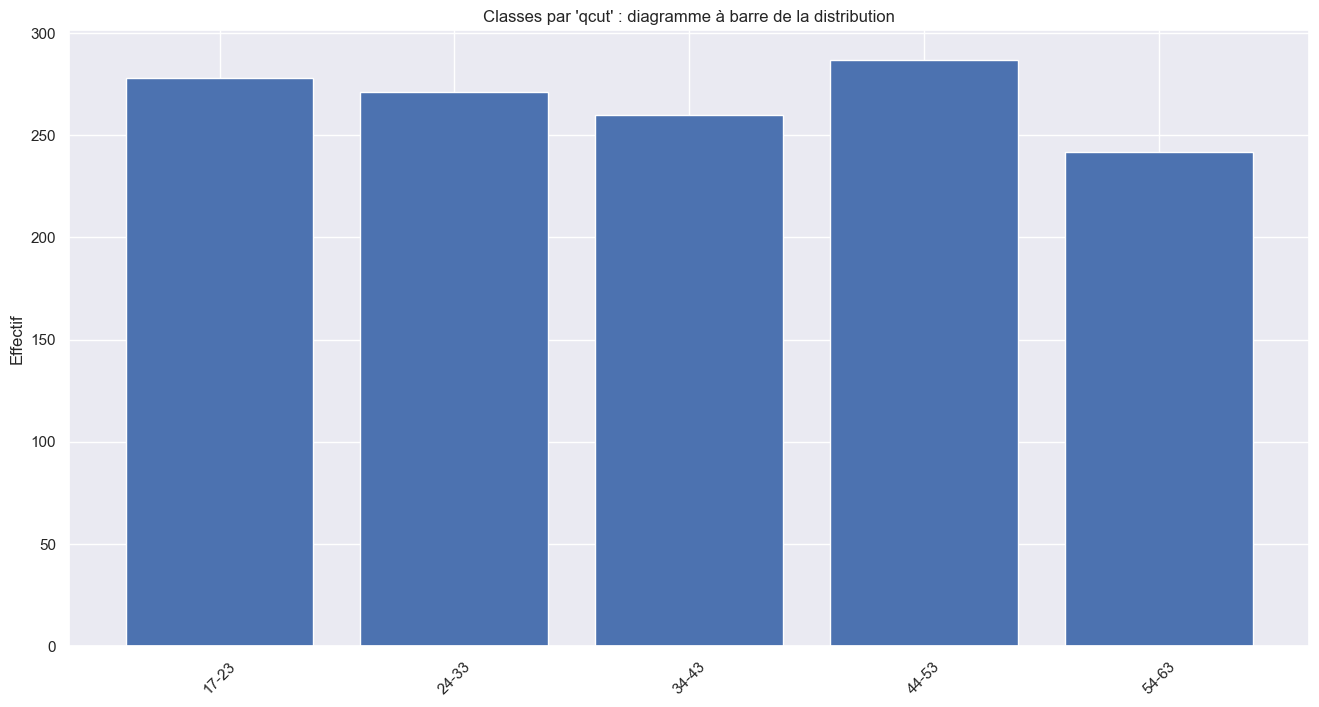

In [58]:
### Diagramme à barre, non adapté et trompeur: ce n'est pas un vrai histogramme
# Attention aux différentes étendues des ages, les densités des tranches sont différentes

p1 = plt.bar(objects, eff)

plt.ylabel('Effectif')
plt.title(f"Classes par '{nom}' : diagramme à barre de la distribution")
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Histogramme

In [196]:
### Représentation automatique
# Dix classes de la même amplitude en abscisses, effectifs (!) en ordonnées

#c_obs['age'].hist()

### Application aux différents découpages des générations (exemples)

In [197]:
gb_generation_heur = gb_generation_heur.reset_index()
gb_generation_heur.columns=['generation', 'effectif']
gb_generation_heur.head()

,generation,effectif
0,18-25,306
1,26-35,268
2,36-45,264
3,46-55,284
4,56-63,194


In [198]:
gb_generation_qcut = gb_generation_qcut.reset_index()
gb_generation_qcut.columns=['generation', 'effectif']
gb_generation_qcut.head()

,generation,effectif
0,17-23,278
1,24-33,271
2,34-43,260
3,44-53,287
4,54-63,242


In [199]:
### L'histogramme est basé sur la densité de différentes tranches
#  Cette fonction calcule la densité des tranches
def calculer_densite(ligne):
    i = ligne['generation'].split('-')
    # print(i)
    ampl = int(i[1])-int(i[0])
    # print(ampl)
    d = round(ligne['frequence']/ampl,4)
    return(d)

In [200]:
### Séparer et préparer les différentes valeurs
def preparer_valeurs(df):
    df['frequence'] = (df['effectif']/df['effectif'].sum()).round(4)
    df['densité'] = df.apply(calculer_densite, axis=1)
    df['start'] = df.apply(lambda x : int(x['generation'].split('-')[0]), axis=1)
    df['width'] = df.apply(lambda x : int(x['generation'].split('-')[1])-int(x['generation'].split('-')[0]), axis=1)
    return df

In [201]:
ndf = preparer_valeurs(gb_generation_heur)
ndf.head()

,generation,effectif,frequence,densité,start,width
0,18-25,306,0.2325,0.0332,18,7
1,26-35,268,0.2036,0.0226,26,9
2,36-45,264,0.2006,0.0223,36,9
3,46-55,284,0.2158,0.0240,46,9
4,56-63,194,0.1474,0.0211,56,7


In [65]:
ndf1 = preparer_valeurs(gb_generation_qcut)
ndf1.head()

,generation,effectif,frequence,densité,start,width
0,17-23,278,0.2078,0.0346,17,6
1,24-33,271,0.2025,0.0225,24,9
2,34-43,260,0.1943,0.0216,34,9
3,44-53,287,0.2145,0.0238,44,9
4,54-63,242,0.1809,0.0201,54,9


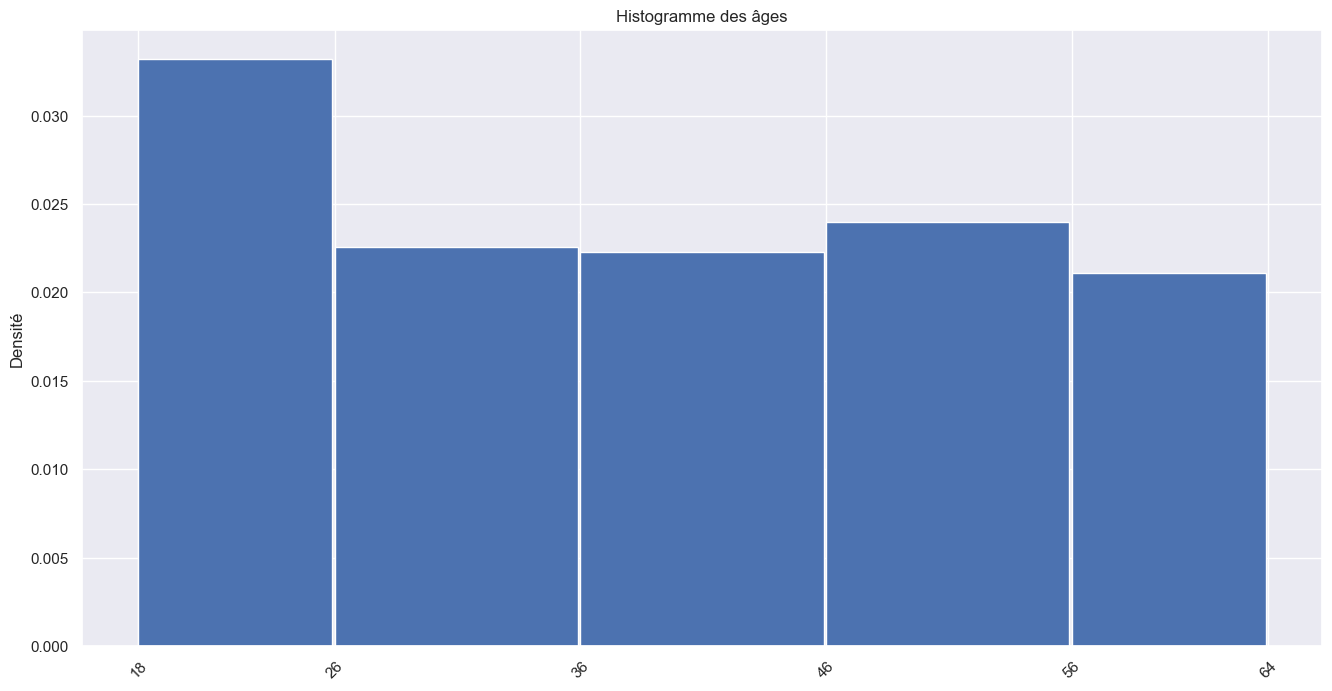

In [67]:
### Histogramme
# La hauteur des barres, en abscisses, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire: à effectif égale aire égale

## Exécuter alternativement et observer ndf et ndf1

df = ndf # ndf ndf1

fig,ax = plt.subplots(1,1)

objects = [l for l in df['start']]
eff = [l for l in df['densité']]
width = [l+0.9 if l < 10 else l for l in df['width']]

p1 = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks([18, 26, 36, 46, 56, 64])
plt.ylabel('Densité')
plt.title('Histogramme des âges')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Distribution de probabilité normale et standardisée

* [Loi normale](https://fr.wikipedia.org/wiki/Loi_normale) (Wikpedia)
* Ci-dessous, représentation utilisant les librairies Numpy (pour produire les données) et Seaborn (pour les représenter)

### QQ Plots
"Q-Q plots are a handy tool for visually inspecting how well your data matches a known probability distribution (prob dsn). If the match is good, the data should line up more or less diagonally in the Q-Q plot. A common usage is to verify normality, i.e. how well the data matches a Normal or Gaussian dsn."
https://www.r-bloggers.com/2011/08/q-q-plots-for-multi-modal-performance-data/

In [202]:
### Représentation automatique
# Densité !
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html
# https://stackoverflow.com/questions/25577317/pandas-histogram-in-python-possible-to-make-probability-density-instead-of-coun

#c_obs['age'].plot(kind='hist', density=True, bins=20)
#c_obs['age'].plot.kde()
#plt.show()

In [203]:
## Ajout d'une colonne avec distribution normalisée
#age = c_obs['age']

#m = age.mean()
#std = age.std()
#print(m, std, '\n')
#c_obs['age_norm'] = c_obs['age'].apply(lambda x : (x-m)/std )
#c_obs.head(10)

In [204]:
#c_obs['age_norm'].plot(kind='hist', density=True, bins=30)
#c_obs['age_norm'].plot.kde()
#plt.show()

In [205]:
### Probabilité totale = aire sous la courbe = 1
# https://seaborn.pydata.org/tutorial/distributions.html
# https://www.statology.org/seaborn-normal-distribution/

#np.random.seed(0)

# Crée un jeu de donnes artificiel en forme normale 
#x = np.random.normal(size=1000)

#create normal distribution curve
#sns.displot(x, kde=True, stat='density')

In [206]:
## QQ Plot d'une distribution normale
# https://www.statology.org/q-q-plot-python/
#sm.qqplot(x, line='45', fit=True)
#plt.show()

In [207]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
# https://www.statology.org/shapiro-wilk-test-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
#stats.shapiro(x)
# Commentaire: la valeur de probabilité n'étant pas inférieure à 0.05 on ne peut par rejeteur l'H0 et donc la distribution est normale à 95% de probabilitéc

In [208]:
### QQ Plot des données concernant l'age de l'échantillon
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
# fit = True normalise automatiquement les données
#sm.qqplot(age, line='s', fit=True)
#plt.arrow(x=-0.2, y=-1.7, dx=-0.2, dy=+0.7, width=.02, facecolor='red') 
#plt.arrow(x=0.4, y=1.8, dx=0.2, dy=-0.5, width=.02, facecolor='red') 
#plt.show()

In [78]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
#sa = stats.shapiro(age)
# Commentaire: la valeur de probabilité est 0.000024199 et donc laragement inférieure à 0.05:
# on doit donc rejeteur l'H0 et considérer que la distribution ne suit pas la loi normale avec 95% de probabilité

In [209]:
#from decimal import Decimal
#print(f'Valeur p en décimales: {Decimal(sa.pvalue)} ({sa.statistic}, {sa.pvalue})')

Cette distribution a une apparence bimodale:
* Bimodal/multimodal probability distribution: https://en.wikipedia.org/wiki/Multimodal_distribution
* https://towardsdatascience.com/understand-q-q-plot-using-simple-python-4f83d5b89f8f



## Exploration des charges

Variable quantitative continue

On applique une méthodologie semblable à la variable précédente avec quelques différences

In [210]:
revenu = ins['charges']
revenu.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [211]:
s_charges = revenu.sort_values()
s_charges.head()

940     1121.8739
808     1131.5066
1244    1135.9407
663     1136.3994
22      1137.0110
Name: charges, dtype: float64

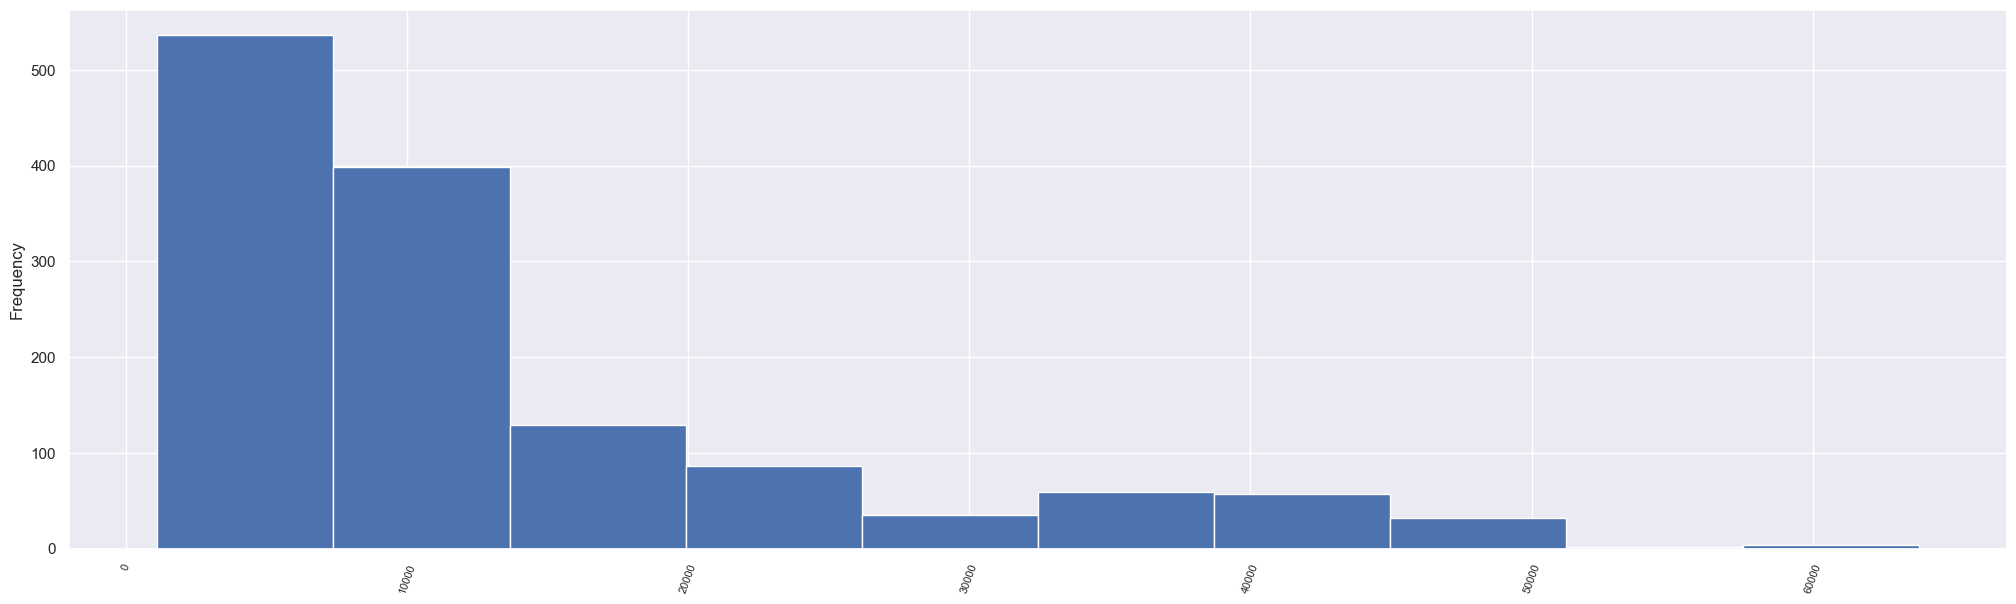

In [88]:
### Affichage des charges triées
ax = s_charges.plot.hist(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [212]:
### Centralité et dispersion
revenu.describe().round(0)

count     1338.0
mean     13270.0
std      12110.0
min       1122.0
25%       4740.0
50%       9382.0
75%      16640.0
max      63770.0
Name: charges, dtype: float64

In [213]:
### Diagramme-boîte ou boîte-à-moustache pour représenter la dispersion
# Ligne centrale = la médiane. Le box est entre 1er et 3e quartile
#  Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
#ins.boxplot(column=['charges'], vert=False, figsize=(16,4))

<Axes: >

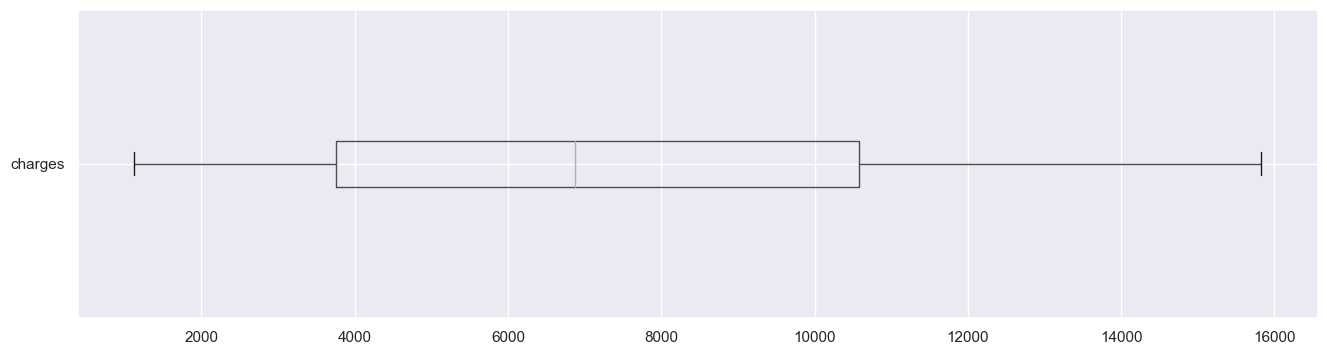

In [93]:
###Eliminer les valeurs extrèmes gâce à un filtre
ins[ins['charges'] < 16000].boxplot(column=['charges'], vert=False, figsize=(16,4))

In [214]:
### Le violin plot montre bien où se situent les charges les plus fréquentes

#sns.set_theme(style="whitegrid")

#sns.set(rc={"figure.figsize":(30, 8)})

#a = ins["charges"]

#ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
#ax.set_xlim(left=min(a), right=max(a))



In [215]:
### Le violin plot montre bien où se situent les charges les plus fréquentes

#sns.set_theme(style="whitegrid")

#sns.set(rc={"figure.figsize":(30, 8)})

#a = ins[ins['charges'] < 12000]["charges"]

#ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
#ax.set_xlim(left=min(a), right=max(a))



In [216]:
### Créer quatre classes de charges en utilisant les quartiles
# Chaque classe contient ainsi un quart de la population
df_s_charges = pd.DataFrame(s_charges)
df_s_charges['qcut'] = pd.qcut(df_s_charges['charges'], 4)
df_s_charges.head()

,charges,qcut
940,1121.8739,"(1121.873, 4740.287]"
808,1131.5066,"(1121.873, 4740.287]"
1244,1135.9407,"(1121.873, 4740.287]"
663,1136.3994,"(1121.873, 4740.287]"
22,1137.0110,"(1121.873, 4740.287]"


In [217]:
### Regrouper par classe et ajouter le nombre d'individus
gbdf_size_charges = df_s_charges.groupby(by='qcut').size()
gbdf_size_charges = gbdf_size_charges.reset_index()
gbdf_size_charges.columns = ['qcut', 'effectif']
gbdf_size_charges.head()

,qcut,effectif
0,"(1121.873, 4740.287]",335
1,"(4740.287, 9382.033]",334
2,"(9382.033, 16639.913]",334
3,"(16639.913, 63770.428]",335


In [218]:
### Ajouter la fréquence
gbdf_size_charges['frequence_eff'] = (gbdf_size_charges['effectif'] \
                / gbdf_size_charges['effectif'].sum()).round(6)
gbdf_size_charges.head()

,qcut,effectif,frequence_eff
0,"(1121.873, 4740.287]",335,0.250374
1,"(4740.287, 9382.033]",334,0.249626
2,"(9382.033, 16639.913]",334,0.249626
3,"(16639.913, 63770.428]",335,0.250374


In [219]:
### Regrouper par classe et ajouter la somme des salaires par classe
gbdf_sum_charges = df_s_charges.groupby(by='qcut').sum()
gbdf_sum_charges = gbdf_sum_charges.reset_index()
gbdf_sum_charges.columns = ['qcut', 'somme']
gbdf_sum_charges.head()

,qcut,somme
0,"(1121.873, 4740.287]",9.557850e+05
1,"(4740.287, 9382.033]",2.335282e+06
2,"(9382.033, 16639.913]",4.043429e+06
3,"(16639.913, 63770.428]",1.042133e+07


In [220]:
### Ajouter une colonne avec la fréquence
gbdf_sum_charges['frequence_somme'] = (gbdf_sum_charges['somme'] \
                / gbdf_sum_charges['somme'].sum()).round(6)
gbdf_sum_charges.head()

,qcut,somme,frequence_somme
0,"(1121.873, 4740.287]",9.557850e+05,0.053829
1,"(4740.287, 9382.033]",2.335282e+06,0.131522
2,"(9382.033, 16639.913]",4.043429e+06,0.227724
3,"(16639.913, 63770.428]",1.042133e+07,0.586925


In [221]:
### Ajouter la fréquence cumulée
gbdf_sum_charges['frequence_cumulee_somme'] = gbdf_sum_charges['frequence_somme'].cumsum()
gbdf_sum_charges.head()

,qcut,somme,frequence_somme,frequence_cumulee_somme
0,"(1121.873, 4740.287]",9.557850e+05,0.053829,0.053829
1,"(4740.287, 9382.033]",2.335282e+06,0.131522,0.185351
2,"(9382.033, 16639.913]",4.043429e+06,0.227724,0.413075
3,"(16639.913, 63770.428]",1.042133e+07,0.586925,1.000000


In [108]:
def calculer_densite_width(ligne, colonne_frequence):
    x = ligne['qcut']
    ampl = int(x.right) - int(x.left)
    right = int(x.right)
    left = int(x.left)
    d = round(ligne[colonne_frequence]/ampl,8)
    return([d, left, right, ampl])

In [222]:
### Fusionner les tableaux
gbdf_merged = pd.merge(gbdf_size_charges, gbdf_sum_charges, on='qcut')
gbdf_merged.head()

,qcut,effectif,frequence_eff,somme,frequence_somme,frequence_cumulee_somme
0,"(1121.873, 4740.287]",335,0.250374,9.557850e+05,0.053829,0.053829
1,"(4740.287, 9382.033]",334,0.249626,2.335282e+06,0.131522,0.185351
2,"(9382.033, 16639.913]",334,0.249626,4.043429e+06,0.227724,0.413075
3,"(16639.913, 63770.428]",335,0.250374,1.042133e+07,0.586925,1.000000


In [223]:
gbdf_merged['densite_eff'] = gbdf_merged.apply(lambda x: calculer_densite_width(x, 'frequence_eff'), axis=1)
gbdf_merged.head()

,qcut,effectif,frequence_eff,somme,frequence_somme,frequence_cumulee_somme,densite_eff
0,"(1121.873, 4740.287]",335,0.250374,9.557850e+05,0.053829,0.053829,"[6.918e-05, 1121, 4740, 3619]"
1,"(4740.287, 9382.033]",334,0.249626,2.335282e+06,0.131522,0.185351,"[5.378e-05, 4740, 9382, 4642]"
2,"(9382.033, 16639.913]",334,0.249626,4.043429e+06,0.227724,0.413075,"[3.44e-05, 9382, 16639, 7257]"
3,"(16639.913, 63770.428]",335,0.250374,1.042133e+07,0.586925,1.000000,"[5.31e-06, 16639, 63770, 47131]"


In [224]:
gbdf_merged.apply(lambda x: x['densite_eff'].append(x['frequence_cumulee_somme']), axis=1)
gbdf_merged.head()

,qcut,effectif,frequence_eff,somme,frequence_somme,frequence_cumulee_somme,densite_eff
0,"(1121.873, 4740.287]",335,0.250374,9.557850e+05,0.053829,0.053829,"[6.918e-05, 1121, 4740, 3619, 0.053829]"
1,"(4740.287, 9382.033]",334,0.249626,2.335282e+06,0.131522,0.185351,"[5.378e-05, 4740, 9382, 4642, 0.185351]"
2,"(9382.033, 16639.913]",334,0.249626,4.043429e+06,0.227724,0.413075,"[3.44e-05, 9382, 16639, 7257, 0.41307499999999..."
3,"(16639.913, 63770.428]",335,0.250374,1.042133e+07,0.586925,1.000000,"[5.31e-06, 16639, 63770, 47131, 1.0]"


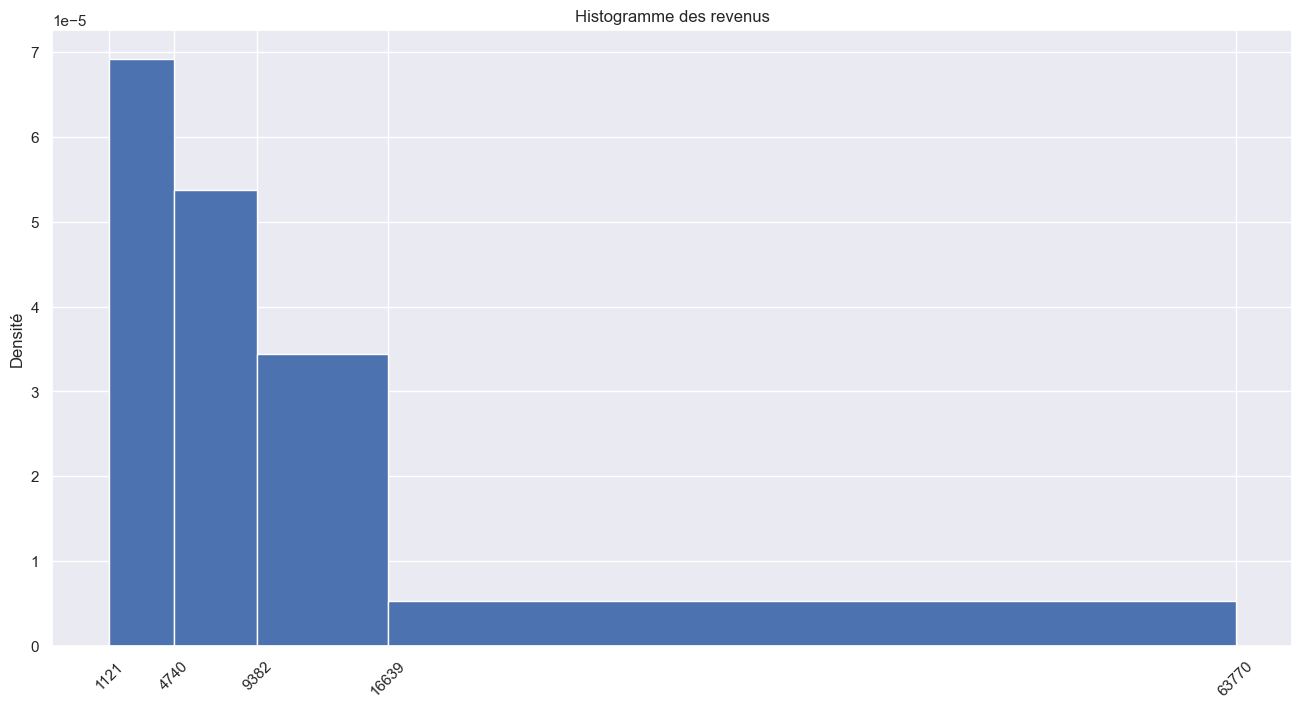

In [225]:
### Histogramme
# La hauteur des barres, en ordonnées, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire

fig,ax = plt.subplots(1,1)

objects = [l[1] for l in gbdf_merged['densite_eff']]
eff = [l[0] for l in gbdf_merged['densite_eff']]
width = [l[3]  for l in gbdf_merged['densite_eff']]


fig = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks(objects + [[l[2] for l in gbdf_merged['densite_eff']][-1]])
plt.ylabel('Densité')
plt.title('Histogramme des revenus')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

In [226]:
### Le graphique par défaut de Matplotlib, 
#  ne met pas en évidence la spécificité de la distribution,
# Ceci dépend d'un (et illustre un) découpage des classes non pertinent
#n, bins, patches = plt.hist(s_charges, bins=5, density=False)
#print(n)
#plt.xticks(bins)
#plt.show()

In [227]:
### Le graphique par défaut de Matplotlib, 
#  ne met pas en évidence la spécificité de la distribution,
#  i.e. le nombre élevé de revenus autour de 8000 CHF
# Ceci dépend d'un (et illustre un) découpage des classes non pertinent
#n, bins, patches = plt.hist(s_charges, density=True)
#ax = s_charges.plot.kde()

#ax.set_xlim(1300, 46000)
#plt.xticks(bins)
#plt.show()

In [228]:
### Ajouter les fréquences cumulées à l'histogramme de la densité des effectifs
#fig, ax = plt.subplots(1)


#objects = [l[1] for l in gbdf_merged['densite_eff']]
#eff = [l[0] for l in gbdf_merged['densite_eff']]
#width = [l[3]  for l in gbdf_merged['densite_eff']]
#valeur = [round(l[4],2) for l in gbdf_merged['densite_eff']]
#ticks = [l[1] + (l[3]/2) for l in gbdf_merged['densite_eff']]



#define aesthetics for plot
#color1 = 'steelblue'
#color2 = 'red'
#line_size = 5


#ax.bar(objects, eff, width = width, align="edge", color=color1)
#ax1 = ax.twinx()
#ax1.plot(ticks,valeur, color = color2,  marker="D", ms=line_size)


#ax.set_xticks(objects + [[l[2] for l in gbdf_merged['densite_eff']][-1]])

#plt.title('Histogramme des revenus avec fréquence cumulative des sommes par classe')
#plt.gcf().set_size_inches(16, 8)

#ax.set_xlabel('Classes de revenus')
#ax.set_ylabel('Densité')

#specify axis colors
#ax.tick_params(axis='y', colors=color1)
#ax1.tick_params(axis='y', colors='white')
#ax1.set_ylabel('Fréquence cumulée de la  somme des salaires')

#plt.yticks(ticks=valeur, minor=True, labels= valeur, color=color2)
#plt.xticks(rotation=45)


#plt.show()

### Distribution de probabilité

In [229]:
#a = pd.DataFrame(ins[ins['charges'] < 12000]["charges"])
#a.columns=['charges']
#print(type(a))
#a['charges'].plot(kind='hist', density=True, bins=20)
#a['charges'].plot.kde()
#plt.show()

In [230]:
### QQ Plot des données concernant les revenus de l'échantillon
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
# fit = True normalise automatiquement les données
#sm.qqplot(a['charges'], line='s', fit=True)
#plt.arrow(x=-0.8, y=-2.2, dx=-0.15, dy=+0.6, width=.02, facecolor='red') 
#plt.arrow(x=0.2, y=1.8, dx=0.12, dy=-0.5, width=.02, facecolor='red') 
#plt.show()

### Commentaire

Noter que la distribution n'est pas normale mais multimodale, avec deux ou trois sommets, et qu'il y a des valeurs extrèmes. 
Cf. les références proposées ci-dessus au sujet de la distribution de l'âge.

On ne peut donc pas effectuer des tests paramétriques utilisant la distribution normale et que la correlation de Pearsons (cf. analyse quantitative bivariée) n'est pas appliquable à cette variable.

Comme la distribution est multimodale, l'application de transformations simples comme le logarithme naturel ne permet pas de se rapprocher de la distribution normale, comme ce serait le cas si la distribution était exponentielle.

On pourrait toutefois préciser l'analyse en découpant ultérieurement la population et en mettant en évidence les deux-trois parties à distribution normale, tout en vérifiant que ça a du sens par rapport au contexte et aux autres variables. On pourrait par exemple découper par tranches d'age.

Voir les explications de ce carnet: https://www.kaggle.com/code/iamleonie/handling-multimodal-distributions-fe-techniques

In [231]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
#sa = stats.shapiro(a['charges'])
#print(sa)
# Commentaire: la valeur de probabilité est 0.000490 et donc laragement inférieure à 0.05:
# on doit donc rejeteur l'H0 et considérer que la distribution ne suit pas la loi normale avec 95% de probabilité

In [232]:
#print(f"{sa.pvalue:.5f}")

## Graphique de Pareto

* [Principe de Pareto](https://fr.wikipedia.org/wiki/Principe_de_Pareto) (Wikipedia)
* [Loi de Pareto](https://fr.wikipedia.org/wiki/Loi_de_Pareto) (Wikipedia)


In [233]:
### Ajouter une colonne avec codage des charges 
# en relation avec des effectifs identiques des classes

#c_obs['charges_cut'] = pd.qcut(c_obs['charges'], 10)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
#c_obs['charges_cut'] = c_obs['charges_cut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
#c_obs.head(5)

In [234]:
### Regrouper et compter par classe de salaire avec la fonction Pandas 'groupby' 
df_charges = pd.DataFrame(c_obs.groupby('charges_cut').size())
df_charges.columns = ['effectif']
#df_charges

In [235]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_charges['frequence'] = (df_charges['effectif'] \
                                   / df_charges['effectif'].sum()).round(2)
#df_charges

In [236]:
### Ajouter la fréquence cumulée
df_charges['frequence_cumulee'] = df_revenu['frequence'].cumsum()
#df_charges.head()

In [237]:
### Regrouper et additionner les salaires par classe 
df_somme = pd.DataFrame(c_obs.groupby('charges_cut')['charges'].sum())
df_somme.columns = ['somme']
#df_somme

In [238]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_somme['frequence_somme'] = (df_somme['somme'] \
                                   / df_somme['somme'].sum()).round(2)
#df_somme.head()

In [239]:
### Ajouter la fréquence cumulée
df_somme['frequence_somme_cumulee'] = df_somme['frequence_somme'].cumsum()
#df_somme.head()

In [240]:
df_merged = pd.merge(df_charges, df_somme, left_index=True, right_index=True)
#df_merged

In [241]:
### Pareto distribution
# https://www.statology.org/pareto-chart-python/


#df = df_merged 

#define aesthetics for plot
#color1 = 'steelblue'
#color2 = 'red'
#line_size = 4

#create basic bar plot
#fig, ax = plt.subplots()
#ax.bar(df.index, df['frequence_somme'], color=color1)

#plt.title('Histogramme des revenus avec fréquence cumulative des sommes par classe (rouge) et de la population (vert)')

#plt.gcf().set_size_inches(16, 8)
#add cumulative percentage line to plot
#ax2 = ax.twinx()
#ax2.plot(df.index, df['frequence_somme_cumulee'], color=color2, marker="D", ms=line_size)
# ax2.yaxis.set_major_formatter(PercentFormatter())

#ax3 = ax.twinx()
#ax3.plot(df.index, df['frequence_cumulee'], color='green', linestyle='dashed')

#specify axis colors
#ax.tick_params(axis='y', colors=color1)
#ax2.tick_params(axis='y', colors=color2)
# cacher les valeurs de cette variable
#ax3.set_yticks([])

#plt.axvline(x=4.35, color='red', linestyle='--')

#display Pareto chart
#plt.show()

#### Commentaire du graphique

On note que l'accroissement de la richesse ne suit pas celui de la population:
* à la médiane de la population (indiquée par la ligne vertical rouge qui indique les 50% de la fréquence cumulée) on n'a atteint qu'autour de 30% des salaires cumulés 
* les 20 % les plus riches de la population accumulent presque 40 % des revenus